In [100]:
import pandas as pd

In [101]:
import seaborn as sns

In [102]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Titanic.csv")

In [223]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_gr,fare_gr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young,"(-0.512, 102.466]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mid,"(-0.512, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young,"(-0.512, 102.466]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young,"(-0.512, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young,"(-0.512, 102.466]"


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  age_gr       714 non-null    category
 13  fare_gr      891 non-null    category
dtypes: category(2), float64(2), int64(5), object(5)
memory usage: 85.8+ KB


# Описательная таблица

In [234]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Из данной таблицы мы видим, что в наборе данных содержится 891 строка, что соответствует 891 пассажиру. Средний **коэффициент выживаемости** составляет 38,38%. Пассажиров 3 класса было больше 50%. 25% пассажиров имели возраст до ~20 лет, ещё 25% - от 20 до 28 лет, ещё 25% - от 28 до 38 лет, и оставшиеся 25% были старше 38 лет.

Сначала рассмотрим зависимость **коэффициента выживаемости** от **класса билета**:

In [326]:
class_surv = df.groupby(['Pclass'], as_index=False).\
agg({'Pclass':'mean', 'Survived':'sum', 'PassengerId':'count'}).round(2)

In [327]:
class_surv

,Pclass,Survived,PassengerId
0,1.0,136,216
1,2.0,87,184
2,3.0,119,491


Из данной таблицы видно, что чем выше класс, тем выше процент выживаемости пассажиров. На диаграммах ниже показано распределение по классам в общей массе пассажиров и среди выживших. Сразу бросается в глаза, что среди общей массы пассажиры первого класса составляли 24%, при этом среди выживших их 40%.

Text(0.5, 1.0, 'classes among the survivors')

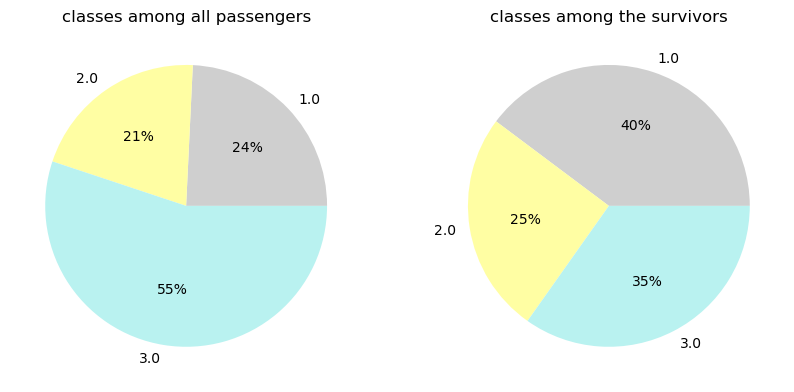

In [332]:
plt.figure (figsize = (10,5))
plt.subplot (121)
plt.pie(class_surv.PassengerId, labels=class_surv.Pclass, autopct='%.0f%%', colors = sns.color_palette('pastel')[7:12])
plt.title('classes among all passengers')

plt.subplot (122)
plt.pie(class_surv.Survived, labels=class_surv.Pclass, autopct='%.0f%%', colors = sns.color_palette('pastel')[7:12])
plt.title('classes among the survivors')

Далее рассмотрим **коэффициент выживаемости** в зависимости от **порта посадки**:

In [217]:
df.groupby('Embarked', as_index = False).agg({'PassengerId':'count', 'Survived':['sum','mean']})

Embarked PassengerId Survived          
                 count      sum      mean
0        C         168       93  0.553571
1        Q          77       30  0.389610
2        S         644      217  0.336957

Из таблицы видно, что наиболее высокий коэффициент выживания у пассажиров, севших в порте Шербур, для пассажиров из Квинстауна коэффициент соответствует среднему (0,38), а для пассажиров из Саутгемптона он ниже среднего. Рассмотрим версию, что коэффициент выживаемости порта зависит от классового состава севших в нём пассажиров:

In [309]:
df.groupby(['Embarked', 'Pclass']).agg({'Pclass':'count', 'Survived':'mean'}).round(2)

Pclass  Survived
Embarked Pclass                  
C        1           85      0.69
         2           17      0.53
         3           66      0.38
Q        1            2      0.50
         2            3      0.67
         3           72      0.38
S        1          127      0.58
         2          164      0.46
         3          353      0.19

Согласно данной таблице, в порту Шербур доля пассажиров первого класса выше, чем в остальных. Вероятно, именно это влияет на коэффициент выживаемости по порту посадки. Однако, также можно заметить, что для всех классов пассажиров, севших в Шербуре, коэффициент выживаемости выше, чем для тех, кто сел в Саутгемптоне.
Создадим новую таблицу, в которой рассмотрим выживаемость пассажиров в зависимости от пола, возраста и порта посадки

Для дальнейшего анализа добавим деление пассажиров на возрастные группы (0-15 лет, 15-35 лет, 35-55 лет, старше 55 лет)

In [ ]:
age_groups = [[0, 15, 35, 55, 100],['kids', 'young', 'mid', 'old']]

In [144]:
df['age_gr']= pd.cut(df['Age'],
                     bins=age_groups[0],
                     labels=age_groups[1])

In [145]:
df['fare_gr']= pd.cut(df['Fare'],
                     bins=5)

In [203]:
new_df = df.groupby(['Embarked', 'age_gr'], as_index = True).\
            agg({'age_gr':'count'})

In [205]:
new_df['f_total_col'] = df.query('Sex == "female"').groupby(['Embarked', 'age_gr']).agg({'Survived':'count'}).round(2)
new_df['m_total_col'] = df.query('Sex == "male"').groupby(['Embarked', 'age_gr']).agg({'Survived':'count'}).round(2)
new_df['f_surv_col'] = df.query('Sex == "female"').groupby(['Embarked', 'age_gr']).agg({'Survived':'sum'}).round(2)
new_df['m_surv_col'] = df.query('Sex == "male"').groupby(['Embarked', 'age_gr']).agg({'Survived':'sum'}).round(2)
new_df['f_surv_q'] = df.query('Sex == "female"').groupby(['Embarked', 'age_gr']).agg({'Survived':'mean'}).round(2)
new_df['m_surv_q'] = df.query('Sex == "male"').groupby(['Embarked', 'age_gr']).agg({'Survived':'mean'}).round(2)

In [231]:
new_df.drop('age_gr', axis=1)

f_total_col  m_total_col  f_surv_col  m_surv_col  f_surv_q  \
Embarked age_gr                                                               
C        kids             13            5          11           3      0.85   
         young            27           41          25          14      0.93   
         mid              18           15          16           5      0.89   
         old               3            8           3           2      1.00   
Q        kids              1            4           1           0      1.00   
         young            10            6           6           1      0.60   
         mid               1            3           0           0      0.00   
         old               0            3           0           0       NaN   
S        kids             29           31          16          18      0.55   
         young           108          222          81          31      0.75   
         mid              44           95          32          17      0.73   
         old               5           20           4           2      0.80   

                 m_surv_q  
Embarked age_gr            
C        kids        0.60  
         young       0.34  
         mid         0.33  
         old         0.25  
Q        kids        0.00  
         young       0.17  
         mid         0.00  
         old         0.00  
S        kids        0.58  
         young       0.14  
         mid         0.18  
         old         0.10

В данной таблице видно, что самый высокий коэффициент выживания, независимо от порта посадки, у детей (за исключением Квинстауна, из 4х мальчиков не выжил ни один). Также из таблицы видно, что у женщин коэффициент выживания в любой возрастной группе выше, чем у мужчин.

In [283]:
df.groupby('Embarked').agg({'Pclass':'count', 'Age':'count'})

,Pclass,Age
Embarked,,
C,168,130
Q,77,28
S,644,554


Данные о возрасте большей части пассажиров, севших в **Квинстауне**, отсутствуют, поэтому коэффициент выживаемости в зависимости от возраста по данному порту не точен.

Рассмотрим коэффициенты выживаемости в зависимости от пола и класса на графиках:

C:\Users\j10r2\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


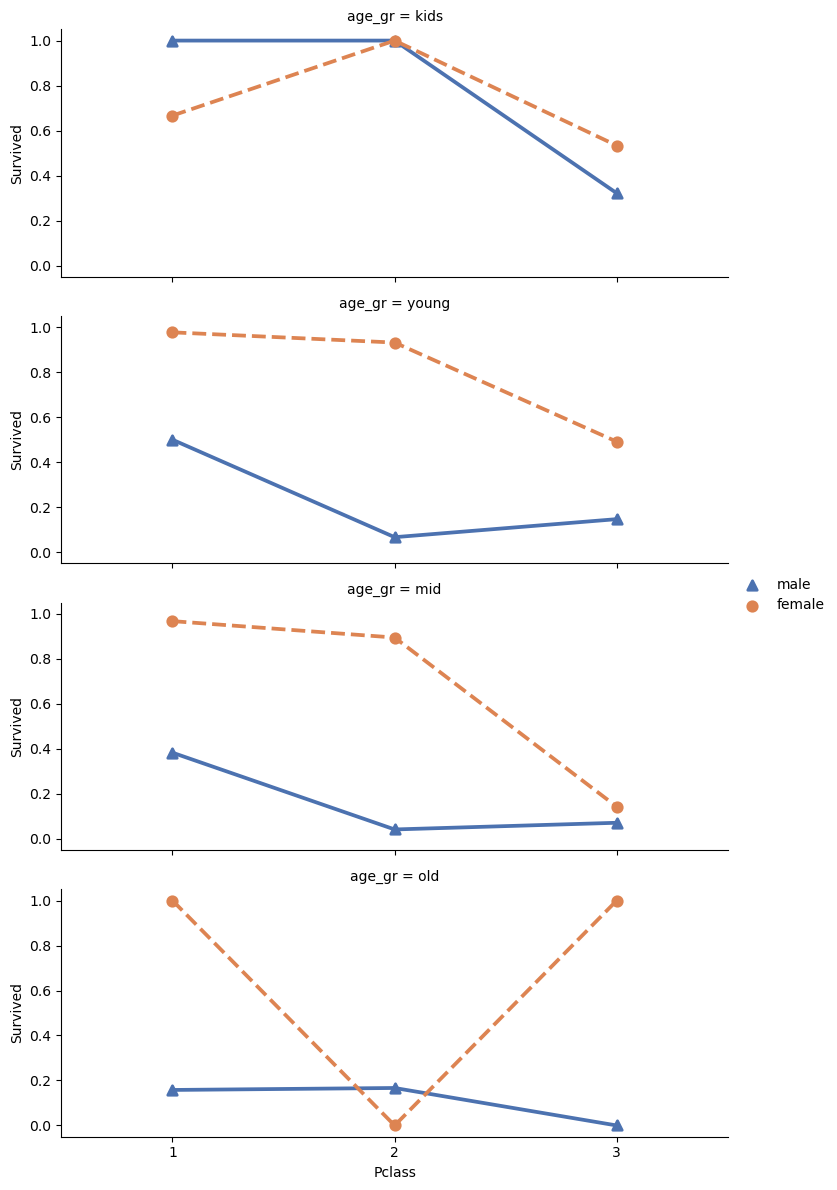

In [334]:
sns.FacetGrid(data=df,row="age_gr",aspect=2.5)\
.map(sns.pointplot,"Pclass","Survived","Sex",hue_order=["male","female"],ci=None,palette="deep", 
     markers=["^", "o"], linestyles=["-", "--"]).add_legend()
 
plt.show()

## Итоговые выводы:

1. Выживаемость пассажиров первого класса выше и доля их среди выживших больше, чем у второго и третьего классов
2. По какой-то причине средняя выживаемость пассажиров всех классов, севших в порте Шербур, выше, чем аналогичные показатели у пассажиров из двух других портов.
3. Выживаемость у женщин значительно выше, чем у мужчин, исключение составляют только мальчики до 15 лет, у них средний коэффициент выживаемости значительно выше, чем у прочих возрастных групп мужчин, и примерно такой же, как у девочек аналогичного возраста. При этом выживаемость детей для 3 класса ниже, чем для 1 и 2.